In [134]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8



In [135]:
train_1 = pd.read_csv('/kaggle/input/emotion-transcript-data-from-introduction-videos/emotion_data/1/emotion.csv')
train1 = train_1.copy()

In [136]:
train1.describe()

,image_seq,angry,disgust,fear,happy,sad,surprise,neutral
count,87.000000,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000
mean,45.390805,14.451059,6.168965e-01,18.382797,5.865318,13.575324,8.744969,38.363648
std,27.587643,18.544205,2.679399e+00,25.073562,11.237819,19.787221,19.621163,33.468718
min,0.000000,0.164384,2.400910e-10,0.079219,0.000005,0.000073,0.000008,0.000117
25%,22.500000,1.867450,8.769180e-05,1.862945,0.143215,1.845405,0.210637,8.035385
50%,44.000000,6.412790,3.443590e-03,6.366870,1.476330,5.578010,0.970922,28.221400
75%,68.500000,18.765500,6.486260e-02,21.010100,5.569355,14.056700,6.524355,71.227450
max,94.000000,71.172500,2.150890e+01,94.981800,66.222300,91.563600,97.834400,97.823000


In [137]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          87 non-null     object 
 1   image_seq         87 non-null     int64  
 2   angry             87 non-null     float64
 3   disgust           87 non-null     float64
 4   fear              87 non-null     float64
 5   happy             87 non-null     float64
 6   sad               87 non-null     float64
 7   surprise          87 non-null     float64
 8   neutral           87 non-null     float64
 9   dominant_emotion  87 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.9+ KB


In [138]:
labels_dict = {'angry':'3', 'disgust':'4', 'fear':'5', 'happy':'1', 'sad':'6', 'surprise':'2', 'neutral':'0'}
train1['description'] = train1['dominant_emotion'].map(labels_dict)
train1.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion,description
0,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,0,4.31735,0.000594,2.879790,1.65035,2.779980,0.600814,87.77110,neutral,0
1,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,1,53.22530,2.981640,12.736800,1.52347,1.051320,27.216800,1.26462,angry,3
2,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,2,8.79651,0.029468,2.968160,16.83150,39.884600,0.279335,31.21050,sad,6
3,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,3,9.45303,0.106778,1.553080,20.93010,3.503870,0.909426,63.54370,neutral,0
4,93663f94-bf0a-4ce8-a29a-a5236cc7fe6a,4,56.00020,0.000004,0.162231,5.58358,0.197026,12.807600,25.24940,angry,3


# **EMOTION ANALYSIS**


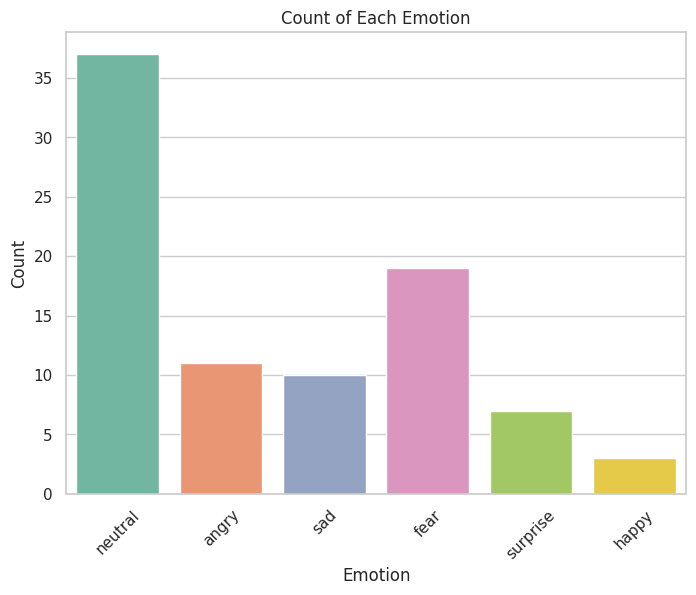

In [139]:
sns.set(style="whitegrid")  # Set the style of the plot

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(data=train1, x='dominant_emotion', palette='Set2')  # 'Set2' is a color palette, you can change it to your preference

# Add labels and title
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Count of Each Emotion')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [140]:
def merge_data(numb):
    file_path="/kaggle/input/emotion-transcript-data-from-introduction-videos/emotion_data/"
    emotion_path=f"{file_path}{numb}/emotion.csv"
    gaze_path=f"{file_path}{numb}/gaze.csv"
    metadata_path=f"{file_path}{numb}/metadata.csv"

    df1 = pd.read_csv(emotion_path).astype(str)
    df2 = pd.read_csv(gaze_path).astype(str)
    merged_df = pd.merge(left=df1, right=df2, on=['movie_id','image_seq'])
    return merged_df

    


In [141]:
# Making df{i} variables to save all emotion+gaze together
for i in range(1,11):
    exec(f'df{i} = merge_data(i)')

In [142]:
numeric_columns = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral','gaze','blink','eye_offset']
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

for column in numeric_columns:
    for df in df_list:
        df[column] = pd.to_numeric(df[column])

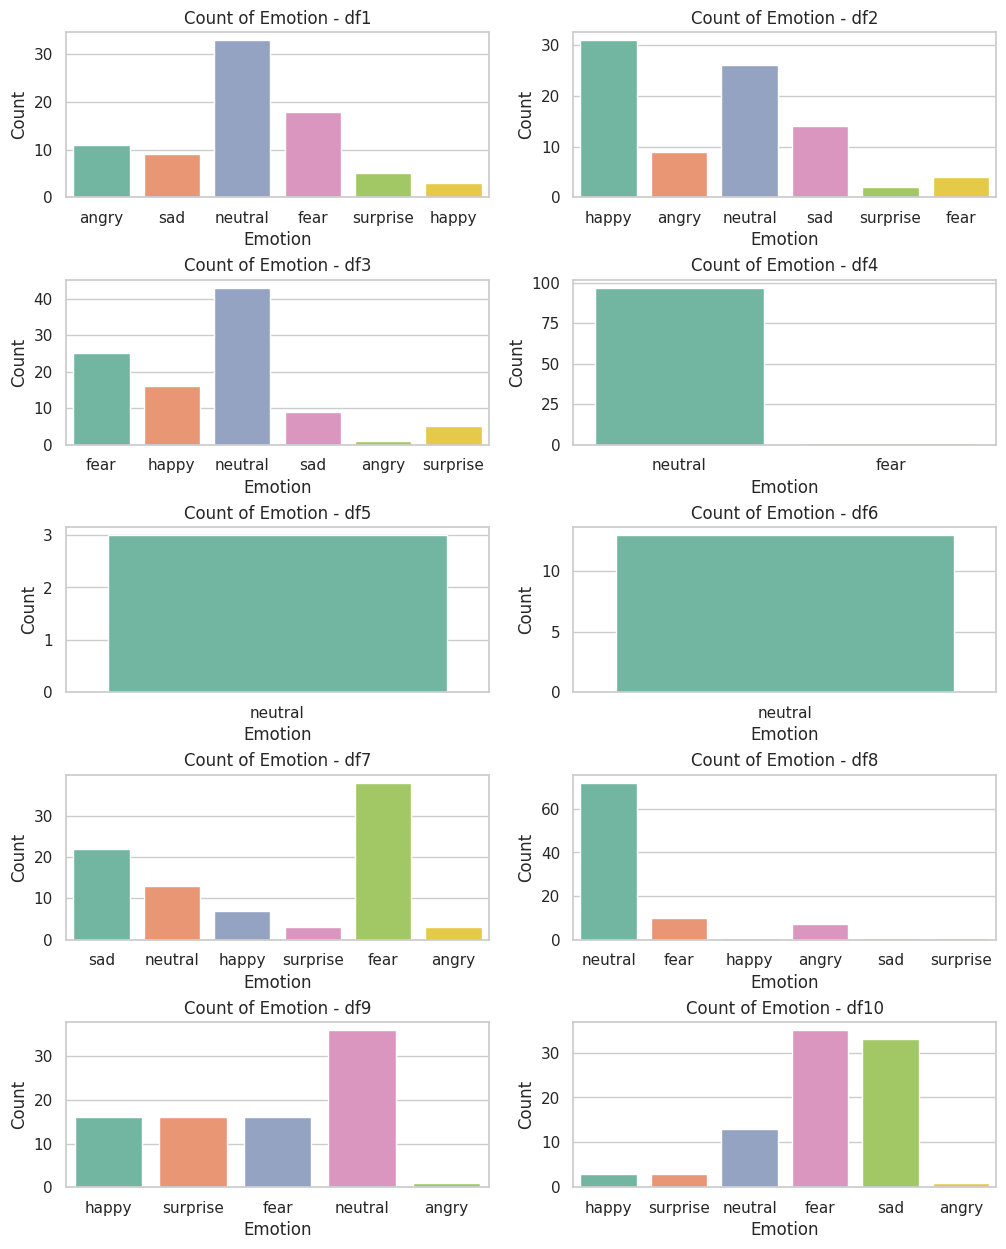

In [143]:
# Create a list of data frames (train2, train3, train4, ..., train10)
data_frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

# Set the style of the plot
sns.set(style="whitegrid")

# Create a 5x2 grid of subplots for the 10 plots
fig, axes = plt.subplots(5, 2, figsize=(12, 15))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Loop through the data frames and plot them in the grid
for i, df in enumerate(data_frames):
    row = i // 2  # Determine the row of the subplot
    col = i % 2   # Determine the column of the subplot
    
    # Create a bar plot for the current data frame
    sns.countplot(data=df, x='dominant_emotion', palette='Set2', ax=axes[row, col])
    
    # Add labels and title
    axes[row, col].set_xlabel('Emotion')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'Count of Emotion - df{i+1}')
    
    # Rotate x-axis labels for better readability (optional)
#     axes[row, col].tick_params(axis='x', rotation=45)

# Show the plots
plt.show()


The data of **person 5 and 6 have missing data**, this is a **huge loss of data** and be problematic when analysing their emotions/facial expression during the introduction videos.

In [144]:
list_of_df = data_frames
emots = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
means = {}
for emot in emots:
    means[emot]=[] 

In [145]:
for df in list_of_df:
    for emot in emots:
        if emot not in df.columns:
            continue
        else:
            mean = df[emot].mean()
            means[emot].append(mean)

In [146]:
means = pd.DataFrame(means)
means

,angry,disgust,fear,happy,sad,surprise,neutral
0,15.249207,6.606278e-01,18.525961,6.081116,13.773940,7.991664,37.717494
1,10.458893,3.963710e-01,6.804512,35.441243,18.206845,2.293307,26.398830
2,1.543934,1.865384e-03,21.436247,21.484492,10.061830,7.341187,38.130447
3,1.732304,3.399538e-04,2.607363,0.578480,1.066901,1.413173,92.601441
4,0.047948,1.587950e-10,0.000259,0.134784,0.035098,0.000805,99.781100
5,0.004368,2.955359e-07,0.037162,21.226808,0.456384,0.004434,78.270869
6,5.706642,1.524636e-01,42.132656,8.012336,23.322030,4.128308,16.545564
7,8.199914,1.132055e-02,11.919183,2.140128,1.970621,1.808903,73.949935
8,6.400612,1.412821e-01,18.775854,16.929422,4.278730,15.945247,37.528853
9,3.937666,4.955215e-02,36.846071,4.300904,31.353840,4.427667,19.084295


# **Principal Component Analysis (PCA)** 
It is a dimensionality reduction technique used for
***feature extraction and data visualization.***

**1. Standardize the Data:**
PCA starts by standardizing the dataset to have a mean of 0 and a standard deviation of 1. This ensures that variables with larger scales do not dominate the analysis.

**2. Calculate the Covariance Matrix:**
PCA calculates the covariance matrix of the standardized data. The covariance matrix represents the relationships between pairs of variables.

**3. Compute Eigenvalues and Eigenvectors:**
The next step is to compute the eigenvalues and eigenvectors of the covariance matrix. Eigenvalues represent the variance explained by each principal component, while eigenvectors define the directions (principal components) in the original feature space.

**4. Sort Eigenvalues:**
Eigenvalues are typically sorted in descending order. The largest eigenvalues correspond to the principal components that explain the most variance in the data.

**5. Select Principal Components:**
Depending on the desired dimensionality reduction, you select a subset of the principal components (eigenvectors) corresponding to the top eigenvalues. The number of components to retain is a crucial decision, impacting the trade-off between dimensionality reduction and information loss.
**6. Create Projection Matrix:**
The selected eigenvectors are combined to form a projection matrix. This matrix is used to transform the original data into a new lower-dimensional space.

**7. Project Data:**
The original data is projected onto the new subspace defined by the selected principal components.
This reduces the dimensionality while retaining the most important information.

**8. Interpretation and Visualization:**
PCA allows for data visualization and interpretation. Principal components can reveal patterns, correlations, and important features in the data.

**9. Explained Variance:**
Eigenvalues represent the explained variance in the data. The first eigenvalue represents the variance explained by the first principal component, and the second eigenvalue represents the variance explained by the second principal component.


In [147]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7, svd_solver='full')
pca.fit(means) # pca fitted 

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[8.32353235e-01 1.19360557e-01 2.55829216e-02 1.84908661e-02
 4.20669137e-03 5.72953855e-06 4.57947495e-15]
[1.05601372e+02 3.99895155e+01 1.85135965e+01 1.57396239e+01
 7.50733938e+00 2.77061095e-01 7.83291778e-06]


In [148]:
means_new = pd.DataFrame(pca.transform(means))
means_new

,0,1,2,3,4,5,6
0,-14.659180,-3.655855,5.025036,10.478442,0.195740,-0.137184,1.585866e-06
1,-24.373811,27.037717,-6.712146,5.149752,0.175536,0.047812,-2.349125e-06
2,-15.164480,7.180921,2.190282,-7.483605,0.180139,-0.021279,-1.714606e-06
3,44.796530,-6.880322,-1.302873,0.695572,-1.438513,0.004207,-8.981816e-08
4,52.588032,-6.917241,-3.000400,-0.189932,-1.681495,-0.060520,-3.836985e-06
5,31.072020,13.464378,-3.464113,-4.762439,1.194652,-0.061883,5.269507e-06
6,-43.672533,-13.587016,-1.354655,-4.153363,3.582606,-0.082143,-1.580945e-06
7,24.177751,-7.507937,2.996662,2.931949,4.109958,0.177337,3.517615e-07
8,-13.533089,6.478464,13.259366,-2.518825,-2.809088,0.049982,7.200026e-08
9,-41.231240,-15.613109,-7.637160,-0.147551,-3.509536,0.083671,2.292344e-06


In [149]:
means_new.describe()

,0,1,2,3,4,5,6
count,1.000000e+01,10.000000,10.000000,1.000000e+01,10.000000,1.000000e+01,1.000000e+01
mean,-1.421085e-15,0.000000,0.000000,2.248202e-16,0.000000,-7.494005e-17,-3.594863e-16
std,3.520046e+01,13.329838,6.171199,5.246541e+00,2.502446,9.235370e-02,2.610973e-06
min,-4.367253e+01,-15.613109,-7.637160,-7.483605e+00,-3.509536,-1.371835e-01,-3.836985e-06
25%,-2.207148e+01,-7.360263,-3.348185,-3.744729e+00,-1.620749,-6.154262e-02,-1.681190e-06
50%,-1.409613e+01,-5.268088,-1.328764,-1.687416e-01,0.177838,-8.535890e-03,-8.908949e-09
75%,2.934845e+01,7.005307,2.795067,2.372855e+00,0.944924,4.943925e-02,1.277340e-06
max,5.258803e+01,27.037717,13.259366,1.047844e+01,4.109958,1.773366e-01,5.269507e-06


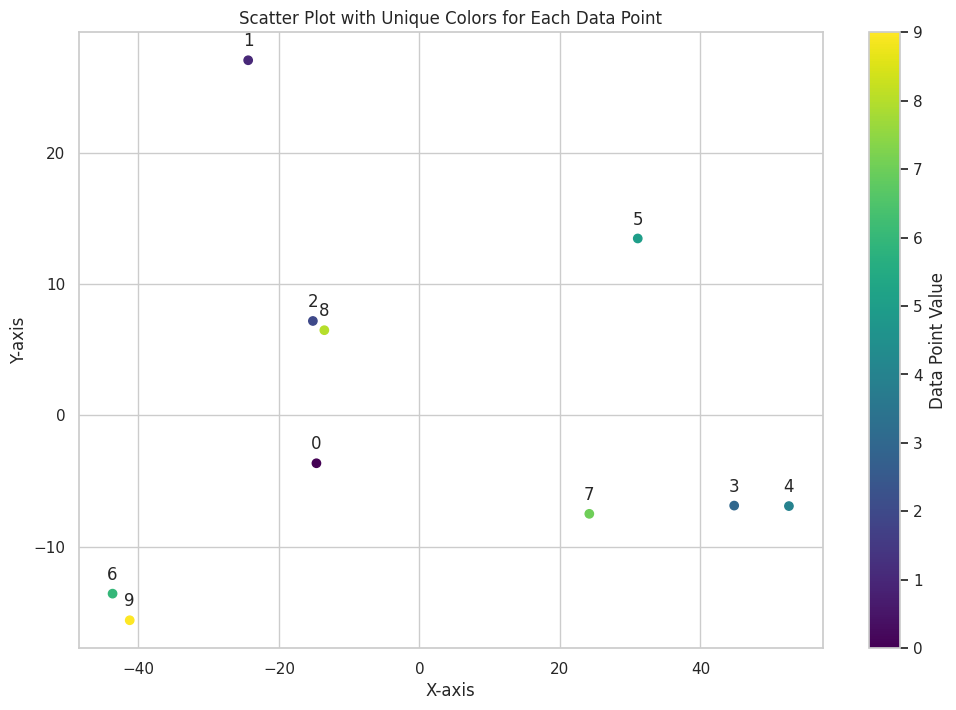

In [150]:
x = means_new[0]
y = means_new[1]
z = means_new[2]

# Generate a list of unique colors for each data point
colors = np.arange(len(x))

# Create a scatter plot with unique colors
plt.scatter(x, y, c=colors, cmap='viridis', marker='o')

# Add a colorbar to represent data point values
cbar = plt.colorbar()
cbar.set_label('Data Point Value')

# Add the values of each data point
for i, txt in enumerate(range(len(x))):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Unique Colors for Each Data Point')

# Show the plot
plt.show()

This scatter plot might not be making any sense right now but **IT IS REALLY A GOLD MINE OF ANSWERS.**

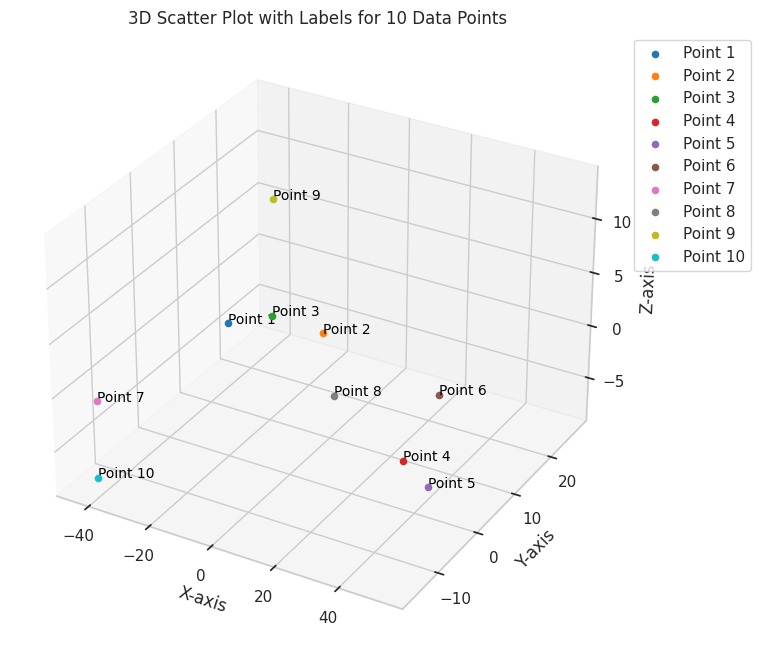

In [151]:
# Labels for data points
labels = ['Point 1', 'Point 2', 'Point 3', 'Point 4', 'Point 5', 'Point 6', 'Point 7', 'Point 8', 'Point 9', 'Point 10']

# Define a list of 10 distinct colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    ax.scatter(x[i], y[i], z[i], c=colors[i], label=labels[i])

    # Add labels to the points
    ax.text(x[i], y[i], z[i], labels[i], fontsize=10, color='black', ha='left')

# Add labels and a legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot with Labels for 10 Data Points')

# Customize legend placement
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# K-means Clustering 
My motivation here behind the use of Clustering is that to get 

In [152]:
means_for_clustering = pd.concat((means_new[0],means_new[1]),axis=1)

In [153]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(means_for_clustering)
kmeans.labels_

array([2, 2, 2, 1, 1, 1, 0, 1, 2, 0], dtype=int32)

# **TRANSCRIPT DATA ANALYSIS**


In [87]:
# def preprocess_data(numb):
#     file_path="/kaggle/input/emotion-transcript-data-from-introduction-videos/transcript_data"
#     transcript_path = f"{file_path}/{numb}.csv                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
#     metadata_path=f"{file_path}{numb}/metadata.csv"

#     df1 = pd.read_csv(emotion_path).astype(str)
#     df2 = pd.read_csv(gaze_path).astype(str)
#     merged_df = pd.merge(left=df1, right=df2, on=['movie_id','image_seq'])
#     return merged_df
# /kaggle/input/emotion-transcript-data-from-introduction-videos/transcript_data/1.csv


In [154]:


def preprocess_transcript_data():
    # Create a dictionary to store DataFrames
    transcript_data = {}

    # Loop through the 10 CSV files and read them into separate variables
    for i in range(1, 11):
        file_path = f"/kaggle/input/emotion-transcript-data-from-introduction-videos/transcript_data/{i}.csv"
        df_name = f"trans_df{i}"

        # Read the CSV file into a DataFrame
        transcript_data[df_name] = pd.read_csv(file_path)

    return transcript_data

# Call the preprocess function to read the CSV files
transcript_data_dict = preprocess_transcript_data()

# Access individual DataFrames like trans_df1, trans_df2, etc.
trans_df1 = pd.DataFrame(transcript_data_dict['trans_df1'])
# Example: Print the first few rows of trans_df1

In [155]:
trans_df1 = pd.DataFrame(transcript_data_dict['trans_df1'])
trans_df2 = pd.DataFrame(transcript_data_dict['trans_df2'])
trans_df3 = pd.DataFrame(transcript_data_dict['trans_df3'])
trans_df4 = pd.DataFrame(transcript_data_dict['trans_df4'])
trans_df5 = pd.DataFrame(transcript_data_dict['trans_df5'])
trans_df6 = pd.DataFrame(transcript_data_dict['trans_df6'])
trans_df7 = pd.DataFrame(transcript_data_dict['trans_df7'])
trans_df8 = pd.DataFrame(transcript_data_dict['trans_df8'])
trans_df9 = pd.DataFrame(transcript_data_dict['trans_df9'])
trans_df10 = pd.DataFrame(transcript_data_dict['trans_df10'])

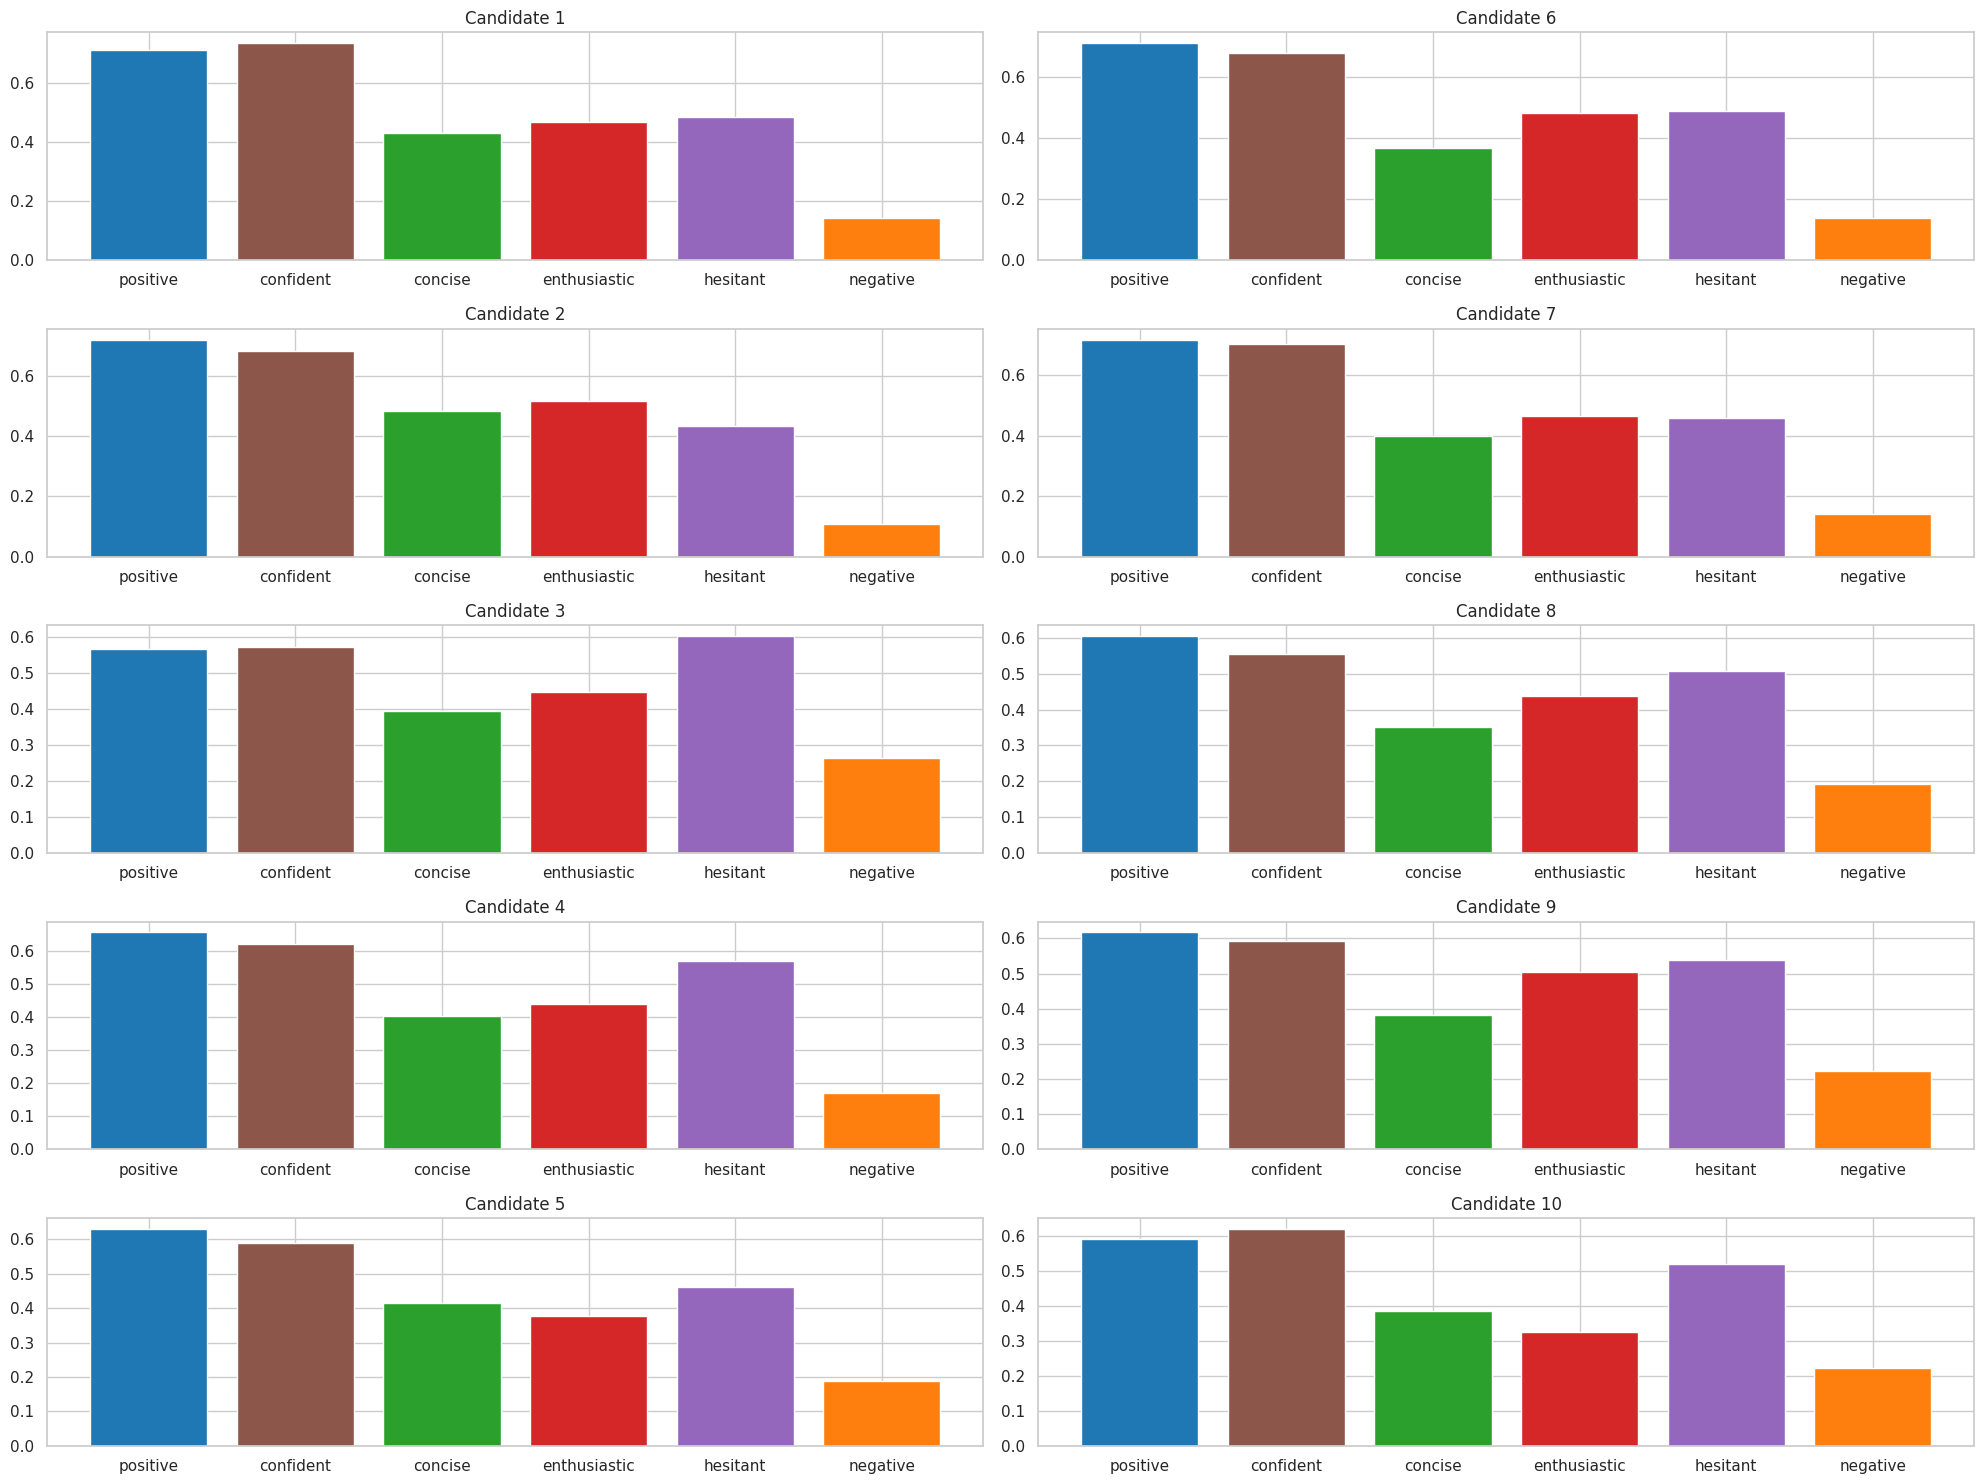

In [156]:
sentiments = ['positive','confident', 'concise', 'enthusiastic', 'hesitant','negative']
colors = ['#1f77b4', '#8c564b', '#2ca02c', '#d62728', '#9467bd','#ff7f0e']

fig, axs = plt.subplots(5, 2, figsize=(20, 15))

for i in range(1, 11):
    file_path = f'/kaggle/input/emotion-transcript-data-from-introduction-videos/transcript_data/{i}.csv'
    row = (i - 1) // 5
    col = (i - 1) % 5
    df = pd.read_csv(file_path)
    data = {}
    for cols in sentiments:
        data[cols] = df[cols].mean()
    categories = list(data.keys())
    values = list(data.values())
    ax = axs[col, row]
    ax.bar(categories, values, color=colors)
    ax.set_title(f'Candidate {i}')

plt.tight_layout()
plt.show()

In [157]:
categories

['positive', 'confident', 'concise', 'enthusiastic', 'hesitant', 'negative']

In [158]:
for i in range(1, 11):
    file_path = f'/kaggle/input/emotion-transcript-data-from-introduction-videos/transcript_data/{i}.csv'
    row = (i - 1) // 5
    col = (i - 1) % 5
    df = pd.read_csv(file_path)
    data = {}
    for cols in columns:
        data[cols] = df[cols].mean()
        

In [163]:
means2={}
for senti in sentiments:
    means2[senti]=[] 

In [164]:
list_of_trans_df = [trans_df1, trans_df2, trans_df3, trans_df4, trans_df5, trans_df6, trans_df7, trans_df8, trans_df9, trans_df10]
for trans_df in list_of_trans_df:
    for senti in sentiments:
        if senti not in trans_df.columns:
            continue
        else:
            mean = trans_df[senti].mean()
            means2[senti].append(mean)


In [165]:
means2 = pd.DataFrame(means2)
means2

,positive,confident,concise,enthusiastic,hesitant,negative
0,0.709199,0.733828,0.429418,0.466497,0.485172,0.141214
1,0.722006,0.684879,0.484221,0.516685,0.436158,0.107541
2,0.567257,0.573566,0.394715,0.448050,0.604004,0.264337
3,0.655748,0.621740,0.403479,0.440626,0.570452,0.169142
4,0.630573,0.590094,0.413644,0.378110,0.461488,0.187013
5,0.711182,0.679755,0.367792,0.481433,0.490252,0.138992
6,0.717354,0.703714,0.398571,0.463940,0.457070,0.140232
7,0.605402,0.555011,0.352011,0.437399,0.507622,0.192292
8,0.617353,0.591842,0.381809,0.505152,0.538732,0.223949
9,0.589267,0.619852,0.385655,0.325507,0.520637,0.220948


In [167]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6, svd_solver='full')
pca.fit(means2) # pca fitted() 

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.6792303  0.16656886 0.07679447 0.0548871  0.02053002 0.00198925]
[0.3214437  0.15918176 0.10808399 0.09137587 0.05588446 0.01739568]


In [169]:
means_new = pd.DataFrame(pca.transform(means2))
means_new

,0,1,2,3,4,5
0,0.116593,0.006569,-0.045359,0.009992,-0.012519,0.005221
1,0.156904,-0.016559,0.040957,0.050870,0.005816,0.004209
2,-0.150952,-0.058869,-0.026185,0.029119,-0.009472,-0.001913
3,-0.025930,-0.023683,-0.032061,0.004956,0.045156,-0.002433
4,-0.039395,0.075306,0.044398,0.014810,0.001948,-0.009450
5,0.081181,-0.016515,-0.011402,-0.050811,0.004445,-0.002183
6,0.109506,0.016970,-0.009529,-0.024086,-0.013297,-0.005649
7,-0.085026,-0.003159,0.051293,-0.036706,0.007862,0.009503
8,-0.058794,-0.075337,0.019803,-0.004512,-0.021804,-0.002402
9,-0.104088,0.095276,-0.031915,0.006368,-0.008135,0.005098


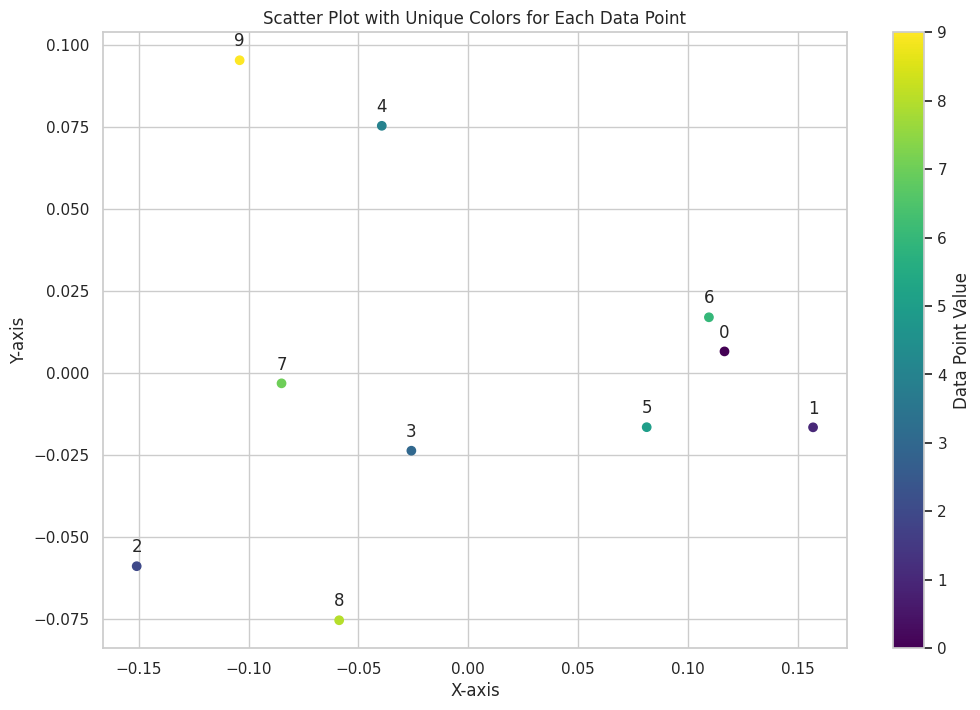

In [170]:
x = means_new[0]
y = means_new[1]
z = means_new[2]

# Generate a list of unique colors for each data point
colors = np.arange(len(x))

# Create a scatter plot with unique colors
plt.scatter(x, y, c=colors, cmap='viridis', marker='o')

# Add a colorbar to represent data point values
cbar = plt.colorbar()
cbar.set_label('Data Point Value')

# Add the values of each data point
for i, txt in enumerate(range(len(x))):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Unique Colors for Each Data Point')

# Show the plot
plt.show()